In [1]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
# Testing the dataset 
path_single = r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_1.h5"
path_single_mask = r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_1.h5"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


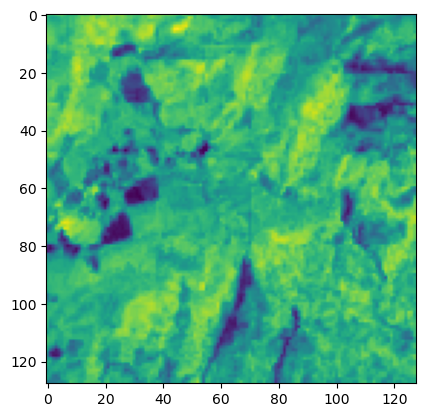

In [3]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


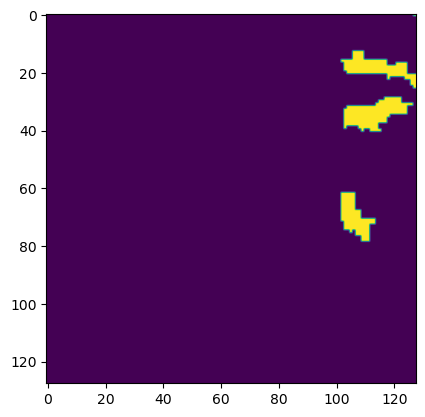

In [4]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [5]:
TRAIN_PATH = r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\*.h5"
TRAIN_MASK = r'C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [6]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_1.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_1.h5
1 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_10.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_10.h5
2 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_100.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_100.h5
3 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_1000.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_1000.h5
4 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_1001.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_

C:\Users\satee\AppData\Local\Temp\ipykernel_2148\3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1677 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_2508.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_2508.h5
1678 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_2509.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_2509.h5
1679 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_251.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_251.h5
1680 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_2510.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_2510.h5
1681 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_2511.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\arc

C:\Users\satee\AppData\Local\Temp\ipykernel_2148\3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2264 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_3036.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_3036.h5
2265 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_3037.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_3037.h5
2266 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_3038.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_3038.h5
2267 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_3039.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_3039.h5
2268 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_304.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\ar

2105 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2894.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2894.h5
2106 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2895.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2895.h5
2107 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2896.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2896.h5
2108 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2897.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2897.h5
2109 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2898.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2898.h5
2110 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2899.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2899.h

2161 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2944.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2944.h5
2162 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2945.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2945.h5
2163 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2946.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2946.h5
2164 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2947.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2947.h5
2165 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2948.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2948.h5
2166 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2949.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2949.h

2219 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2997.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2997.h5
2220 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2998.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2998.h5
2221 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2999.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2999.h5
2222 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3.h5
2223 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_30.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_30.h5
2224 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_300.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_300.h5
2225 C:\sh

C:\Users\nigel\AppData\Local\Temp\ipykernel_23520\3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2268 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_304.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_304.h5
2269 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3040.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3040.h5
2270 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3041.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3041.h5
2271 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3042.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3042.h5
2272 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3043.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3043.h5
2273 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3044.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3044.h5


2328 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3094.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3094.h5
2329 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3095.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3095.h5
2330 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3096.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3096.h5
2331 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3097.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3097.h5
2332 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3098.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3098.h5
2333 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3099.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3099.h

2390 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_315.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_315.h5
2391 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3150.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3150.h5
2392 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3151.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3151.h5
2393 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3152.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3152.h5
2394 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3153.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3153.h5
2395 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3154.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3154.h5


2442 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3197.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3197.h5
2443 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3198.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3198.h5
2444 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3199.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3199.h5
2445 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_32.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_32.h5
2446 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_320.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_320.h5
2447 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3200.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3200.h5
2448

2503 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3251.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3251.h5
2504 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3252.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3252.h5
2505 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3253.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3253.h5
2506 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3254.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3254.h5
2507 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3255.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3255.h5
2508 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3256.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3256.h

2557 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_330.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_330.h5
2558 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3300.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3300.h5
2559 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3301.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3301.h5
2560 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3302.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3302.h5
2561 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3303.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3303.h5
2562 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3304.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3304.h5


2616 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3353.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3353.h5
2617 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3354.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3354.h5
2618 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3355.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3355.h5
2619 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3356.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3356.h5
2620 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3357.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3357.h5
2621 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3358.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3358.h

2677 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3408.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3408.h5
2678 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3409.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3409.h5
2679 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_341.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_341.h5
2680 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3410.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3410.h5
2681 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3411.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3411.h5
2682 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3412.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3412.h5


2738 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3463.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3463.h5
2739 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3464.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3464.h5
2740 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3465.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3465.h5
2741 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3466.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3466.h5
2742 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3467.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3467.h5
2743 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3468.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3468.h

2794 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3513.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3513.h5
2795 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3514.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3514.h5
2796 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3515.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3515.h5
2797 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3516.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3516.h5
2798 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3517.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3517.h5
2799 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3518.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3518.h

2850 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3564.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3564.h5
2851 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3565.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3565.h5
2852 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3566.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3566.h5
2853 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3567.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3567.h5
2854 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3568.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3568.h5
2855 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3569.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3569.h

2904 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3612.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3612.h5
2905 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3613.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3613.h5
2906 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3614.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3614.h5
2907 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3615.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3615.h5
2908 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3616.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3616.h5
2909 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3617.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3617.h

2955 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3659.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3659.h5
2956 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_366.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_366.h5
2957 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3660.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3660.h5
2958 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3661.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3661.h5
2959 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3662.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3662.h5
2960 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3663.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3663.h5


3005 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3703.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3703.h5
3006 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3704.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3704.h5
3007 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3705.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3705.h5
3008 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3706.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3706.h5
3009 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3707.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3707.h5
3010 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3708.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3708.h

3065 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3758.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3758.h5
3066 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3759.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3759.h5
3067 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_376.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_376.h5
3068 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3760.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3760.h5
3069 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3761.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3761.h5
3070 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3762.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3762.h5


3117 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_385.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_385.h5
3118 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_386.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_386.h5
3119 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_387.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_387.h5
3120 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_388.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_388.h5
3121 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_389.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_389.h5
3122 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_39.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_39.h5
3123 C:\shar

3169 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_431.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_431.h5
3170 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_432.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_432.h5
3171 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_433.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_433.h5
3172 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_434.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_434.h5
3173 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_435.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_435.h5
3174 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_436.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_436.h5
3175 C:\sh

3221 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_479.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_479.h5
3222 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_48.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_48.h5
3223 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_480.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_480.h5
3224 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_481.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_481.h5
3225 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_482.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_482.h5
3226 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_483.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_483.h5
3227 C:\shar

3271 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_523.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_523.h5
3272 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_524.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_524.h5
3273 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_525.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_525.h5
3274 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_526.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_526.h5
3275 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_527.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_527.h5
3276 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_528.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_528.h5
3277 C:\sh

3324 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_571.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_571.h5
3325 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_572.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_572.h5
3326 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_573.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_573.h5
3327 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_574.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_574.h5
3328 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_575.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_575.h5
3329 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_576.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_576.h5
3330 C:\sh

3374 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_616.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_616.h5
3375 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_617.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_617.h5
3376 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_618.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_618.h5
3377 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_619.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_619.h5
3378 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_62.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_62.h5
3379 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_620.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_620.h5
3380 C:\shar

3425 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_662.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_662.h5
3426 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_663.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_663.h5
3427 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_664.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_664.h5
3428 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_665.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_665.h5
3429 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_666.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_666.h5
3430 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_667.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_667.h5
3431 C:\sh

3482 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_713.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_713.h5
3483 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_714.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_714.h5
3484 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_715.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_715.h5
3485 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_716.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_716.h5
3486 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_717.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_717.h5
3487 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_718.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_718.h5
3488 C:\sh

3534 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_760.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_760.h5
3535 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_761.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_761.h5
3536 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_762.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_762.h5
3537 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_763.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_763.h5
3538 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_764.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_764.h5
3539 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_765.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_765.h5
3540 C:\sh

3592 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_812.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_812.h5
3593 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_813.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_813.h5
3594 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_814.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_814.h5
3595 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_815.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_815.h5
3596 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_816.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_816.h5
3597 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_817.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_817.h5
3598 C:\sh

3643 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_859.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_859.h5
3644 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_86.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_86.h5
3645 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_860.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_860.h5
3646 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_861.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_861.h5
3647 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_862.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_862.h5
3648 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_863.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_863.h5
3649 C:\shar

3704 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_913.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_913.h5
3705 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_914.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_914.h5
3706 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_915.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_915.h5
3707 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_916.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_916.h5
3708 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_917.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_917.h5
3709 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_918.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_918.h5
3710 C:\sh

3758 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_962.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_962.h5
3759 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_963.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_963.h5
3760 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_964.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_964.h5
3761 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_965.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_965.h5
3762 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_966.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_966.h5
3763 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_967.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_967.h5
3764 C:\sh

In [7]:
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


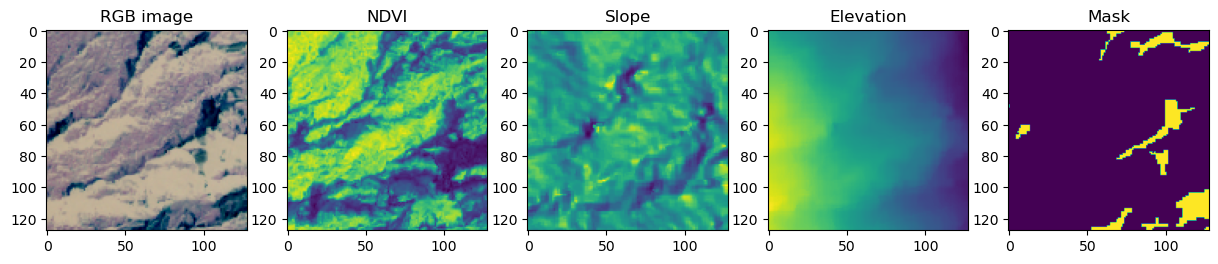

In [8]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.4, shuffle=True)

x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=True)


In [14]:
import sys
sys.path.append(r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\landslide4sense-solution-main\landslide4sense-solution-main\utils\utils.py")

In [15]:
import tensorflow as tf

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

def precision_m(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def recall_m(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall


In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate, Activation, multiply, add, GlobalAveragePooling2D, Reshape, Dense, Lambda

def channel_attention(input_feature, ratio=8):
    channel = input_feature.shape[-1]
    shared_layer_one = Dense(channel // ratio, activation='relu')
    shared_layer_two = Dense(channel, activation='relu')
    
    avg_pool = GlobalAveragePooling2D()(input_feature)
    avg_pool = Reshape((1, 1, channel))(avg_pool)
    assert avg_pool.shape[1:] == (1, 1, channel)
    avg_pool = shared_layer_one(avg_pool)
    assert avg_pool.shape[1:] == (1, 1, channel // ratio)
    avg_pool = shared_layer_two(avg_pool)
    assert avg_pool.shape[1:] == (1, 1, channel)
    
    max_pool = tf.keras.layers.GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1, 1, channel))(max_pool)
    assert max_pool.shape[1:] == (1, 1, channel)
    max_pool = shared_layer_one(max_pool)
    assert max_pool.shape[1:] == (1, 1, channel // ratio)
    max_pool = shared_layer_two(max_pool)
    assert max_pool.shape[1:] == (1, 1, channel)
    
    cbam_feature = add([avg_pool, max_pool])
    cbam_feature = Activation('sigmoid')(cbam_feature)
    
    return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
    kernel_size = 7
    
    avg_pool = Lambda(lambda x: tf.keras.backend.mean(x, axis=3, keepdims=True))(input_feature)
    assert avg_pool.shape[-1] == 1
    max_pool = Lambda(lambda x: tf.keras.backend.max(x, axis=3, keepdims=True))(input_feature)
    assert max_pool.shape[-1] == 1
    concat = concatenate([avg_pool, max_pool], axis=3)
    assert concat.shape[-1] == 2
    cbam_feature = Conv2D(filters=1,
                        kernel_size=kernel_size,
                        strides=1,
                        padding='same',
                        activation='sigmoid',
                        kernel_initializer='he_normal',
                        use_bias=False)(concat)
    
    return multiply([input_feature, cbam_feature])

def cbam_block(cbam_feature):
    cbam_feature = channel_attention(cbam_feature)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

def inception_unet_model(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS):
    inputs = Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

    # Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c3 = cbam_block(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    # Apply CBAM block at the 4th layer
    c4 = cbam_block(c4)

    c5_1 = Conv2D(256, (1, 1), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5_2 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5_3 = Conv2D(256, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5_4 = Conv2D(256, (1, 1), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(c5_4)
    c5 = concatenate([c5_1, c5_2, c5_3, c5_4], axis=3)

    # Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model


In [17]:

# Assuming you have defined x_train, y_train, x_valid, y_valid
# Train the model
model = inception_unet_model(128, 128, 6)

# ModelCheckpoint to save the best model based on validation performance
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_inception_net_Cbam-skip.h5.keras",
    monitor="val_f1_m",  # You might need to define the metric function 'f1_m' for this
    verbose=1,
    save_best_only=True,
    mode="max"
)

# List of callbacks
callbacks = [
    checkpointer
]

# Train the model on train and validation data
history = model.fit(
    x_train, y_train,
    batch_size=16,
    epochs=80,
    verbose=2,
    validation_data=(x_valid, y_valid),
    callbacks=callbacks
)


Epoch 1/80

Epoch 1: val_f1_m improved from -inf to 0.51254, saving model to C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_inception_net_Cbam-skip.h5.keras
143/143 - 103s - 721ms/step - accuracy: 0.9632 - f1_m: 0.0427 - loss: 0.1014 - precision_m: 0.2004 - recall_m: 0.0450 - val_accuracy: 0.9809 - val_f1_m: 0.5125 - val_loss: 0.0505 - val_precision_m: 0.6834 - val_recall_m: 0.4277
Epoch 2/80

Epoch 2: val_f1_m improved from 0.51254 to 0.55763, saving model to C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_inception_net_Cbam-skip.h5.keras
143/143 - 65s - 456ms/step - accuracy: 0.9834 - f1_m: 0.5476 - loss: 0.0448 - precision_m: 0.6981 - recall_m: 0.4826 - val_accuracy: 0.9833 - val_f1_m: 0.5576 - val_loss: 0.0439 - val_precision_m: 0.7739 - val_recall_m: 0.4541
Epoch 3/80

Epoch 3: val_f1_m did not

In [18]:
# Save the model
model.save("model_save_inception_net_cbam_skip.keras")

In [19]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall) 

0.036894116550683975 0.9870582818984985 0.6925025582313538 0.8107278943061829 0.6078698635101318


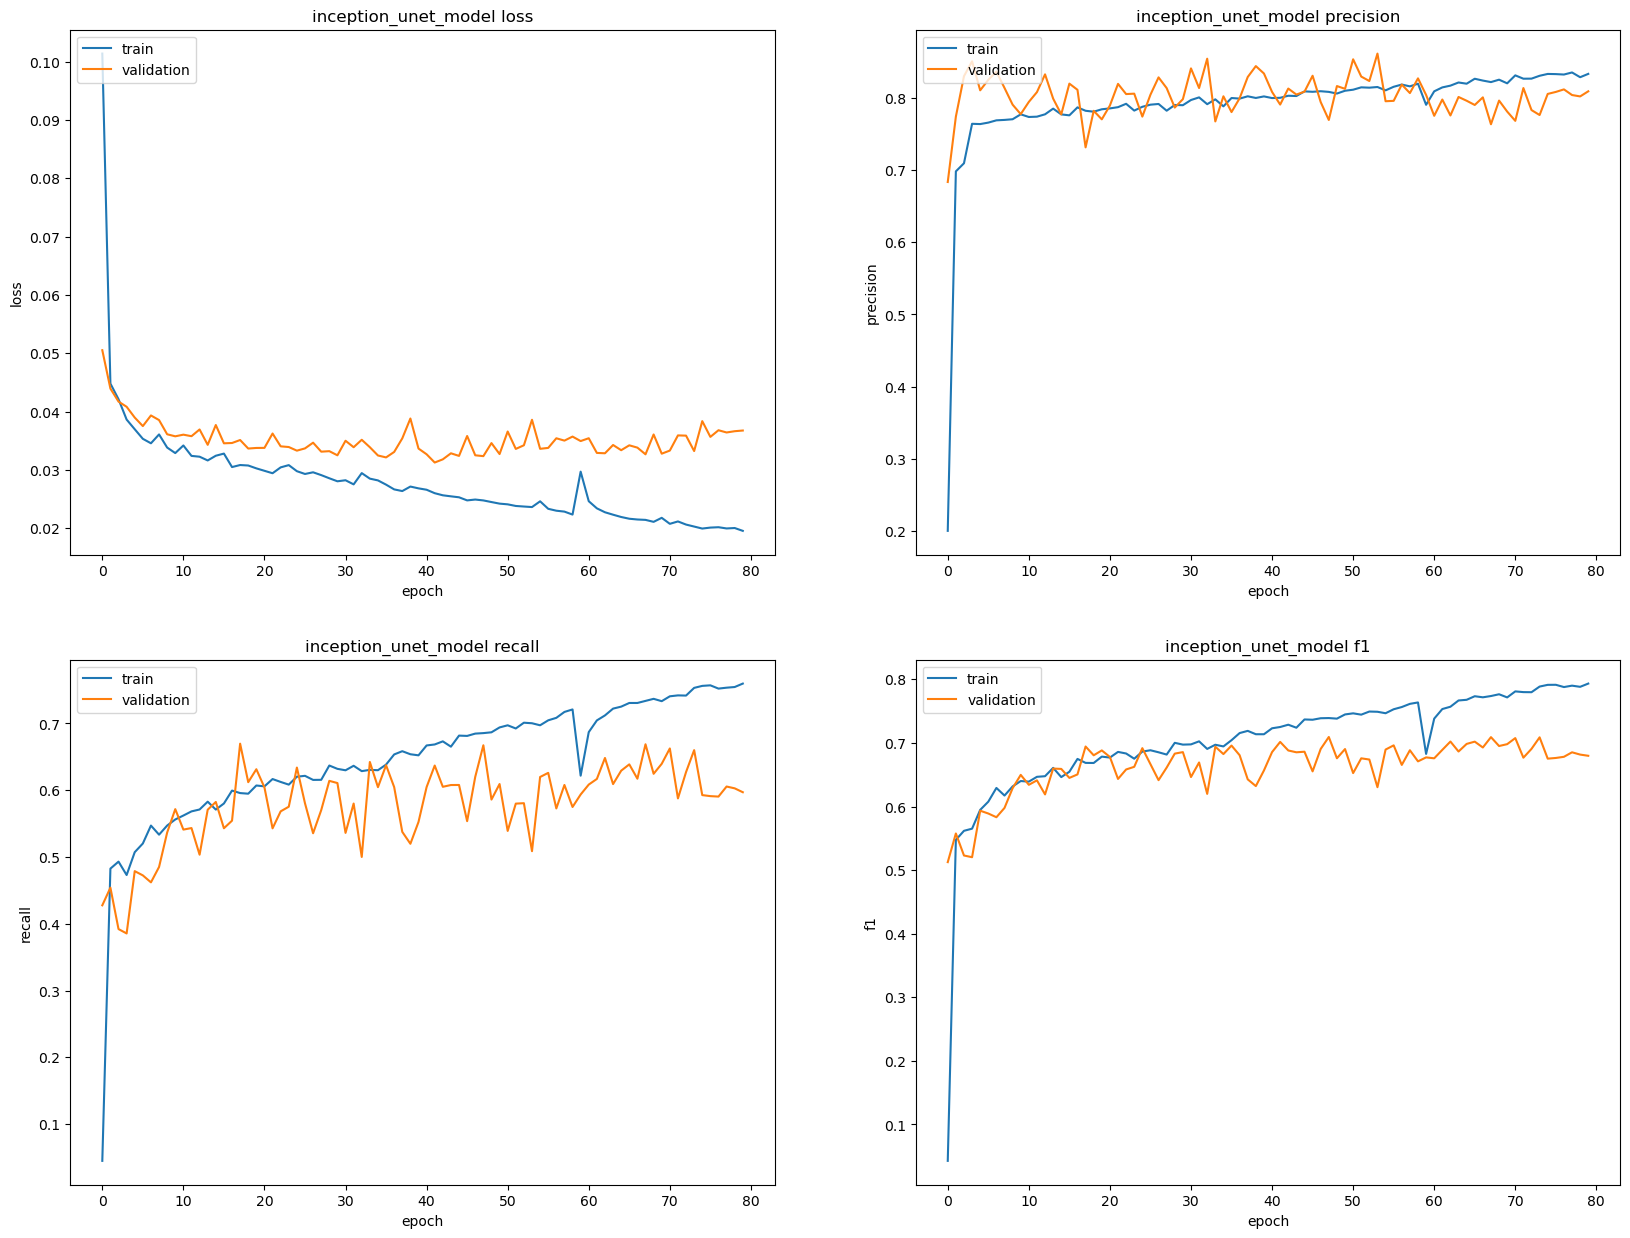

In [20]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('inception_unet_model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('inception_unet_model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('inception_unet_model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('inception_unet_model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [21]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.metrics import precision_recall_curve

def calculate_iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    iou = intersection / union
    return iou

# Evaluate on test set (assuming model has already been trained)
loss = model.evaluate(x_test, y_test, verbose=2)

# Predict on test set
y_pred = model.predict(x_test)

# Convert predictions and ground truth to binary arrays
threshold = 0.5  # Adjust this threshold as needed
y_pred_binary = (y_pred > threshold).astype(np.uint8)
y_test_binary = y_test.astype(np.uint8)

# Calculate precision, recall, f1_score for each class
precision = precision_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')
recall = recall_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')
f1_score_val = f1_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')

# Calculate IOU (Intersection over Union)
iou = calculate_iou(y_test_binary.flatten(), y_pred_binary.flatten())

# Calculate Mean Average Precision (mAP)
# Assuming y_test_binary and y_pred_binary are in the right shape for mAP calculation
n_classes = y_test.shape[-1]  # Number of classes
average_precisions = []
for i in range(n_classes):
    average_precisions.append(average_precision_score(y_test_binary[:, :, i].flatten(), y_pred_binary[:, :, i].flatten()))

mAP = np.mean(average_precisions)

print("Test Metrics:")
print("Loss:", loss)
print("F1 Score:", f1_score_val)
print("Precision:", precision)
print("Recall:", recall)
print("IOU:", iou)
print("mAP:", mAP)


24/24 - 7s - 306ms/step - accuracy: 0.9872 - f1_m: 0.7024 - loss: 0.0372 - precision_m: 0.8031 - recall_m: 0.6279
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 297ms/step
Test Metrics:
Loss: [0.03717866167426109, 0.987214207649231, 0.7023903727531433, 0.8031237125396729, 0.6278581023216248]
F1 Score: 0.9864569796535259
Precision: 0.9862314219444137
Recall: 0.9872141787880345
IOU: 0.5478088724405602
mAP: 0.49885738841862454


In [24]:
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt

# Load test images with numerical sequences
test_url = r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TestData\img\*.h5"
img_test = sorted(glob.glob(test_url))

TEST_XX = np.zeros((800, 128, 128, 6))  # Assuming 800 images
for i, img in enumerate(img_test, start=1):
    with h5py.File(img, 'r') as hdf:
        data = np.array(hdf.get('img'))

        # Assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # Normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # NDVI calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        denominator = np.add(data_nir, data_red)
        data_ndvi = np.zeros_like(data_red)
        non_zero_indices = denominator != 0
        data_ndvi[non_zero_indices] = np.divide(data_nir[non_zero_indices] - data_red[non_zero_indices], denominator[non_zero_indices])

        # Final array
        TEST_XX[i - 1, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  # RED
        TEST_XX[i - 1, :, :, 1] = 1 - data[:, :, 2] / mid_rgb  # GREEN
        TEST_XX[i - 1, :, :, 2] = 1 - data[:, :, 1] / mid_rgb  # BLUE
        TEST_XX[i - 1, :, :, 3] = data_ndvi  # NDVI
        TEST_XX[i - 1, :, :, 4] = 1 - data[:, :, 13] / mid_slope  # SLOPE
        TEST_XX[i - 1, :, :, 5] = 1 - data[:, :, 13] / mid_elevation  # ELEVATION

# Assuming 'model' is your trained model
threshold = 0.5
pred_img = model.predict(TEST_XX)
pred_img = (pred_img > threshold).astype(np.uint8)



25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


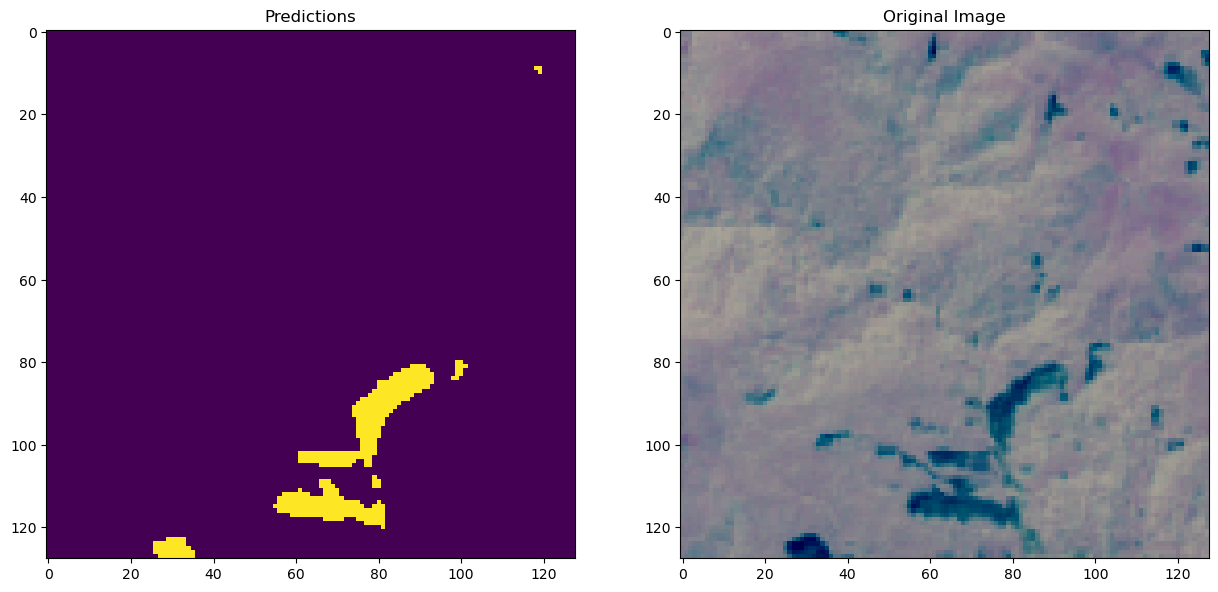

In [25]:
# Plot example prediction and corresponding image
img = 799
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(TEST_XX[img, :, :, 0:3])
ax2.set_title('Original Image')
plt.show()
